## ML-Model: Random Forest

# import libraries

In [3]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#sklearn

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# import custom functions

from custom_functions import get_data_summary, our_metrics, eval_metrics, evaluate_model


import warnings
warnings.filterwarnings('ignore')
RSEED = 42

# Import test and train data, target

In [ ]:
# X_train_minmax = pd.read_csv('data/X_train_minmax.csv', delimiter=',')
# X_test_minmax = pd.read_csv('data/X_test_minmax.csv', delimiter=',')
# X_train_std = pd.read_csv('data/X_train_std.csv', delimiter=',')
# X_test_std = pd.read_csv('data/X_test_std.csv', delimiter=',')
# y_train = pd.read_csv('data/y_train.csv', delimiter=',')
# y_test = pd.read_csv('data/y_test.csv', delimiter=',')

In [2]:
X_train_tree = pd.read_csv('data/X_train_tree.csv', delimiter=',')
X_test_tree = pd.read_csv('data/X_test_tree.csv', delimiter=',')
y_train_tree = pd.read_csv('data/y_train_tree.csv', delimiter=',')
y_test_tree = pd.read_csv('data/y_test_tree.csv', delimiter=',')

In [4]:
#reshape y into array

y_test_tree = np.ravel(y_test_tree)
y_train_tree = np.ravel(y_train_tree)

# Instantiating and training model with default hyperparams

In [10]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train_tree, y_train_tree)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 19.9min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [11]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 641144
Average maximum depth 69


In [13]:
train_rf_predictions = model.predict(X_train_tree)
train_rf_probs = model.predict_proba(X_train_tree)[:, 1]

test_rf_predictions = model.predict(X_test_tree)
test_rf_probs = model.predict_proba(X_test_tree)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   18.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   47.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   45.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   14.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   14.7s finished


In [ ]:
# def evaluate_model(predictions, probs, train_predictions, train_probs):
#     """Compare machine learning model to baseline performance.
#     Computes statistics and shows ROC curve."""
    
#     baseline = {}
    
#     baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
#     baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
#     baseline['roc'] = 0.5
    
#     results = {}
    
#     results['recall'] = recall_score(test_labels, predictions)
#     results['precision'] = precision_score(test_labels, predictions)
#     results['roc'] = roc_auc_score(test_labels, probs)
    
#     train_results = {}
#     train_results['recall'] = recall_score(train_labels, train_predictions)
#     train_results['precision'] = precision_score(train_labels, train_predictions)
#     train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
#     for metric in ['recall', 'precision', 'roc']:
#         print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
#     # Calculate false positive rates and true positive rates
#     base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
#     model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

#     plt.figure(figsize = (8, 6))
#     plt.rcParams['font.size'] = 16
    
#     # Plot both curves
#     plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
#     plt.plot(model_fpr, model_tpr, 'r', label = 'model')
#     plt.legend();
#     plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [ ]:
#evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [21]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Normalized confusion matrix
[[0.99811329 0.00188671]
 [0.71035491 0.28964509]]


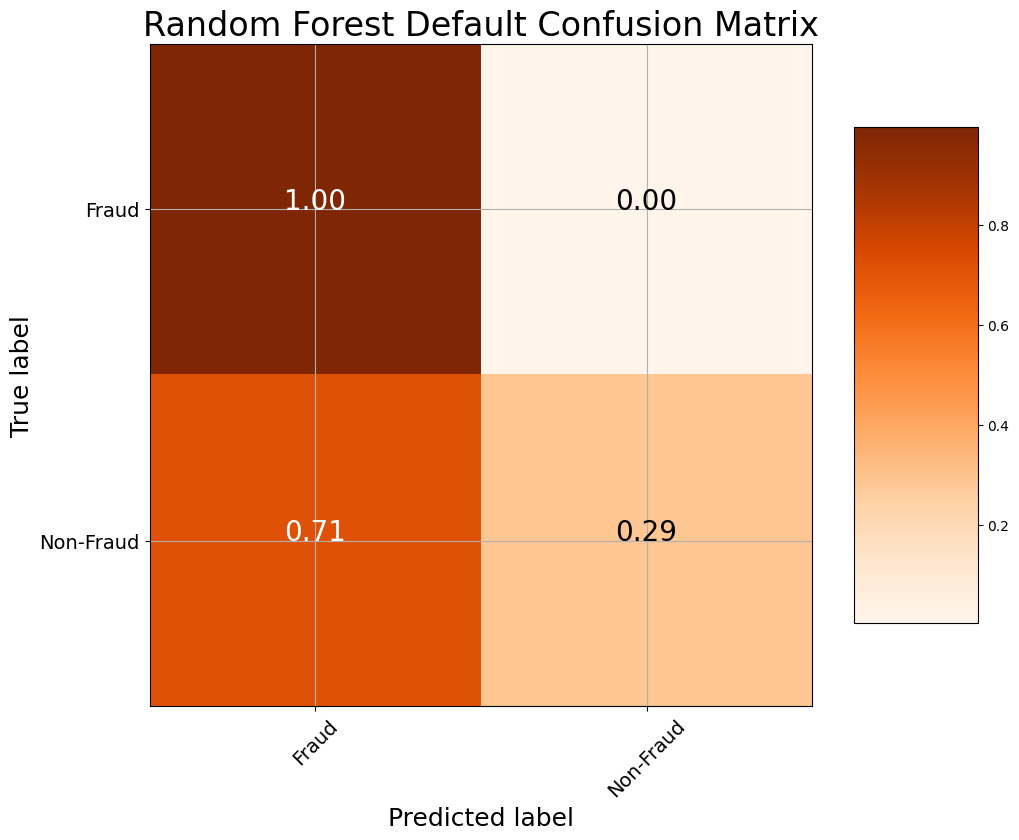

In [22]:
cm = confusion_matrix(y_test_tree, test_rf_predictions)
plot_confusion_matrix(cm, classes = ['Fraud', 'Non-Fraud'],
                     title = 'Random Forest Default Confusion Matrix')